# Assignment 2: Data Modelling
student: Nguyen Dinh Dang Nguyen - s3759957

# Table of contents

1. [Data Preparation](#Data-Preparation)
2. [Data Exploratory](#Data-Exploratory)
   1. [Descriptive Statistics](##Descriptive-Statistics)
   2. [EDA Univariate Analysis](##EDA-Univariate-Analysis)
   3. [EDA Bivariate Analysis](##EDA-Bivariate-Analysis)
3. [Data Modelling](#DAta-Modelling)
   1. [Feature Analysis](##Feature-Analysis)
   2. [Classification](##Classification-Problem)
      1. [Feature selection](###Features-selection)
      2. [Random Forest](###Random-Forest)
      3. [XGBoost](###XGBoost)
   3. [Regression](##Regression-Problem)
      1. [Feature selection](###Features-selection)
      3. [KNN](###KNN-Regression)
      2. [Random Forest](###Random-Forest-Regression)

# Data Preparation


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
# modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import xgboost as xgb
# regression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


This report will outline the efficiency of using Machine Learning methodologies in detecting and preventing obesity based variables such as gender, age, height, weight, family history of obesity, dietary patterns, and physical activity frequency provided by UCI’s “Estimation of Obesity Levels Based On Eating Habits and Physical Condition” dataset. The dataset used in this study, obtained from UCI, contains information on obesity levels among individuals from Mexico, Peru, and Colombia. The participants, aged between 14 and 61, balanced between 2 genders, represent a wide range of dietary habits and physical conditions. The dataset includes 2,111 records, consisting of 16 variables serving as inputted features and 1 as the outputted target. Each of the feature descriptions as listed as follows:


| Variable Name                  | Description                                                                                                     |
| ------------------------------ | --------------------------------------------------------------------------------------------------------------- |
| Gender                         | Gender                                                                                                          |
| Age                            | Age                                                                                                             |
| Height                         | Height                                                                                                          |
| Weight                         | Weight                                                                                                          |
| family_history_with_overweight | Has a family member suffered or suffers from overweight?                                                        |
| FAVC                           | Do you eat high caloric food frequently?                                                                        |
| FCVC                           | Do you usually eat vegetables in your meals?                                                                    |
| NCP                            | How many main meals do you have daily?                                                                          |
| CAEC                           | Do you eat any food between meals?                                                                              |
| SMOKE                          | Do you smoke?                                                                                                   |
| CH2O                           | How much water do you drink daily?                                                                              |
| SCC                            | Do you monitor the calories you eat daily?                                                                      |
| FAF                            | How often do you have physical activity?                                                                        |
| TUE                            | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC                           | How often do you drink alcohol?                                                                                 |
| MTRANS                         | Which transportation do you usually use?                                                                        |
| NObeyesdad                     | Obesity level                                                                                                   |


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Data validation


Code below lists out all unique values of categorical variable. By the results, we can all the values are valid with no additional errors


In [4]:
print("Gender's unique value:", df.Gender.unique())
print("family_history_with_overweight's unique value:", df.family_history_with_overweight.unique())
print("FAVC's unique value:", df.FAVC.unique())
print("CAEC's unique value:", df.CAEC.unique())
print("SMOKE's unique value:", df.SMOKE.unique())
print("SCC's unique value:", df.SCC.unique())
print("CALC's unique value:", df.CALC.unique())
print("MTRANS's unique value:", df.MTRANS.unique())
print("NObeyesdad's unique value:", df.NObeyesdad.unique())


Gender's unique value: ['Female' 'Male']
family_history_with_overweight's unique value: ['yes' 'no']
FAVC's unique value: ['no' 'yes']
CAEC's unique value: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE's unique value: ['no' 'yes']
SCC's unique value: ['no' 'yes']
CALC's unique value: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS's unique value: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad's unique value: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


There is no missing data in the dataset


In [5]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

There 24 duplicated records, which are cleaned as below


In [6]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [7]:
df.drop_duplicates(inplace=True)

Before doing analysis, let's separate dataset into numeric and categorical variables for better observations.

In [8]:
cat_cols=df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Variables:
['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


# Data Exploratory


## Descriptive Statistics


From the statistics summary, we can infer the findings below:


In [9]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087,2087,2087.000000,2087,2087.000000,2087.000000,2087,2087,2087
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,1761,2043,NaN,1991,NaN,NaN,1380,1558,351
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,NaN,NaN,2.004749,NaN,1.012812,0.663035,NaN,NaN,NaN
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,NaN,NaN,0.608284,NaN,0.853475,0.608153,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,NaN,NaN,1.590922,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.630866,NaN,NaN,NaN
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,NaN,NaN,2.466193,NaN,1.678102,1.000000,NaN,NaN,NaN


## EDA Univariate Analysis


### Numerical variables


Age
Skew : 1.51


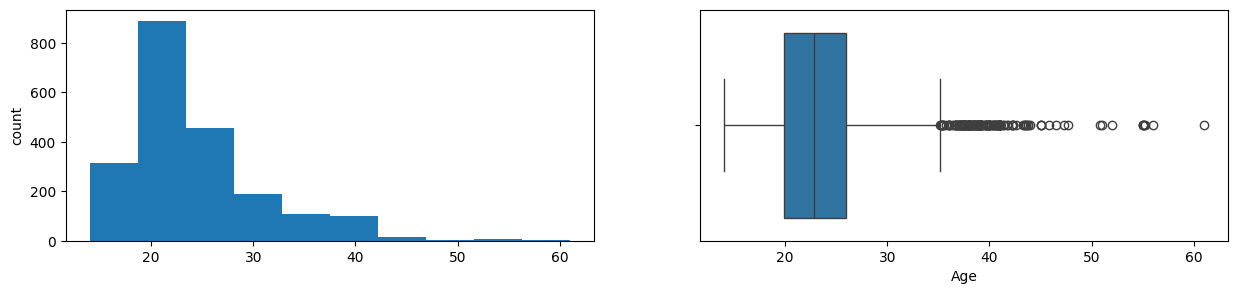

In [10]:
print('Age')
print('Skew :', round(df['Age'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Age'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.show()

Based on the graph and the descriptive statistics of Age, observations can be concluded as:

- The populations of surveyees range from 14 to 61
- However, the data is strongly right-skewed with skewness index of 1.53, which shows the survey targeted young audiences, with the mean ofdage 24
- The real range only accounts for the age of 35 at the upper limit, data beyond this age are so few that them can be considered outliers (which can be retained in the dataset, as their values still fall within the acceptable range)


Height
Skew : -0.02


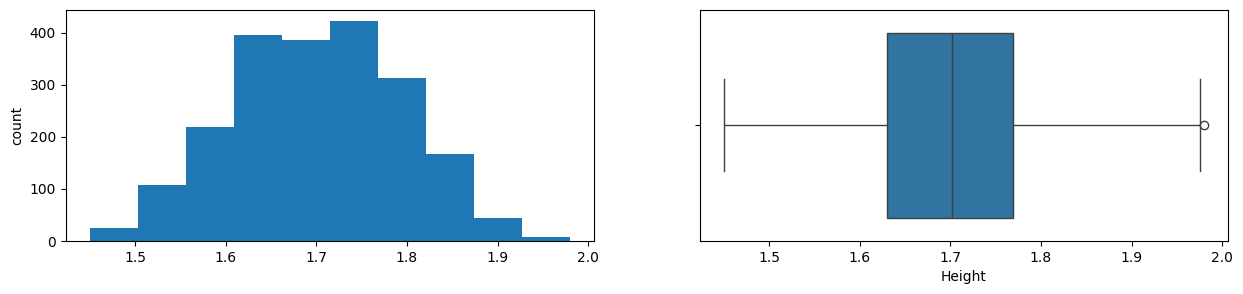

In [11]:
print('Height')
print('Skew :', round(df['Height'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Height'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Height'])
plt.show()

Based on the graph and the descriptive statistics of Height, observations can be concluded as:

- The height populations of surveyees range from 1.45m to 1.98m
- Height is significantly normally distributed with a skewness index of -0.01
- The mean of height is around 1.7m and the only point of outlier is 1.98m


Weight
Skew : 0.24


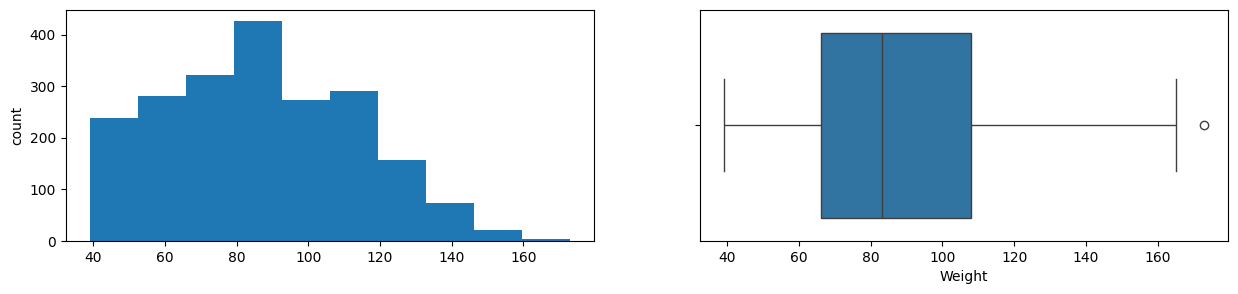

In [12]:
print('Weight')
print('Skew :', round(df['Weight'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['Weight'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Weight'])
plt.show()

Based on the graph and the descriptive statistics of Weight, observations can be concluded as:

- The weight populations of surveyees range from 39kg to 173kg
- Height is slightly right-skewed with skewness index of 0.26
- The mean of weight is around 86kg (which is fairly high for adults) and the only point of outlier is 173kg


CH2O
Skew : -0.11


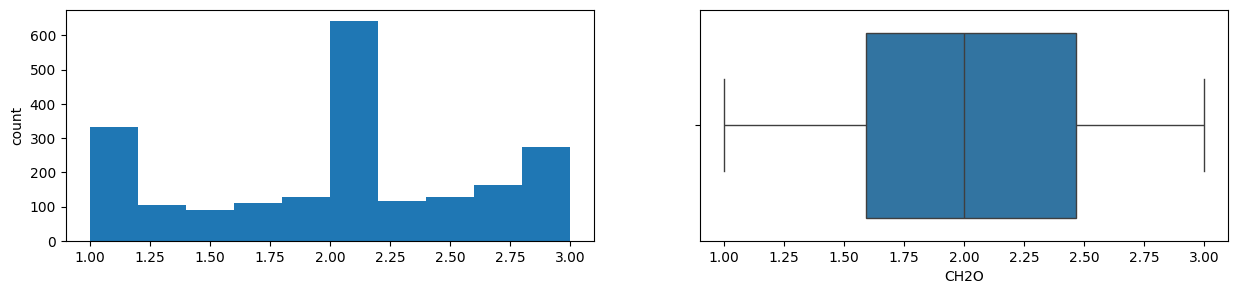

In [13]:
print('CH2O')
print('Skew :', round(df['CH2O'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['CH2O'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CH2O'])
plt.show()

Based on the graph and the descriptive statistics of CH2O, observations can be concluded as:

- The amount of water consumed among the surveyees range from 1 litre to 3 litre
- This data is slightly symmetric with skewness index of -0.1 with no outliers
- There are more than 600 surveyees comsumed around 2 litre of water daily
- The mean of CH2O is 2 litre yet the standard deviation of 0.61 showed that data distribution is quite varied


TUE
Skew : 0.61


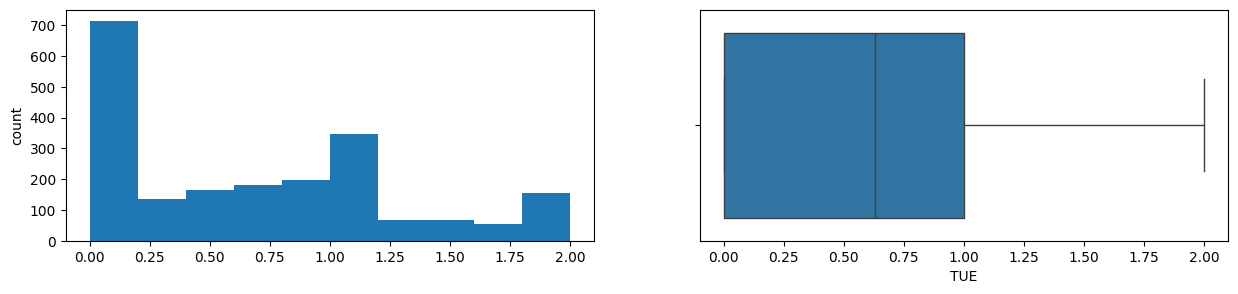

In [14]:
print('TUE')
print('Skew :', round(df['TUE'].skew(), 2))
plt.figure(figsize = (15, 3))
plt.subplot(1, 2, 1)
df['TUE'].hist(grid=False)
plt.ylabel('count')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['TUE'])
plt.show()

Based on the graph and the descriptive statistics of TUE, observations can be concluded as:

- The amount of time used for technological devices among the surveyees range from 0 hour to 2 hours daily
- This data is slightly right-skewed with skewness index of 0.62 with no considered outliers
- There are more than 700 surveyees don't spend time for technological devices at all


### Categorical variables


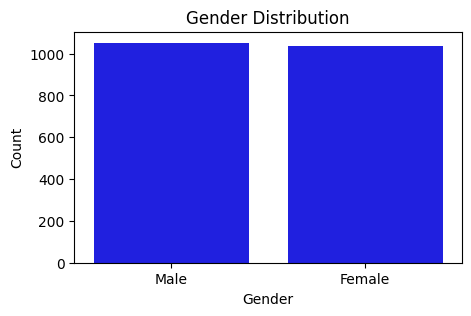

In [15]:
plt.figure(figsize=(5, 3))  # Set the figure size for a single plot
sns.countplot(x='Gender', data=df, color='blue', order=df['Gender'].value_counts().index)
plt.title('Gender Distribution') 
plt.xlabel('Gender')  
plt.ylabel('Count')  
plt.show()


Gender is selected for analysis since naturally indices (weight, height) between the 2 genders are far different and it can affect how overweight index is measured. Based on the graph and the descriptive statistics of Gender, observations can be concluded as:

- The number between each gender are rather identical (with the amount close to 900 each), making the data symmetric between the populations


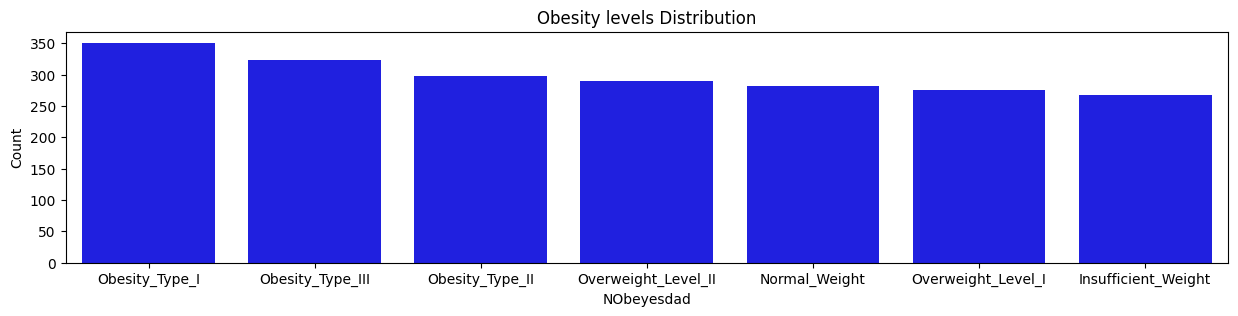

In [16]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='NObeyesdad', data=df, color='blue', order=df['NObeyesdad'].value_counts().index)
plt.title('Obesity levels Distribution') 
plt.xlabel('NObeyesdad')  
plt.ylabel('Count')  
plt.show()


Obesity level is selected for analysis as it is the targeted variable of the dataset (since the survey is conducted to identify elements that affect obesity level)
Based on the graph and the descriptive statistics of NObeyesdad, observations can be concluded as:

- There are 6 classes of obesity type
- Each class's amount is rather identical to each other, proving that serveyees picking is selective based on their appearances.


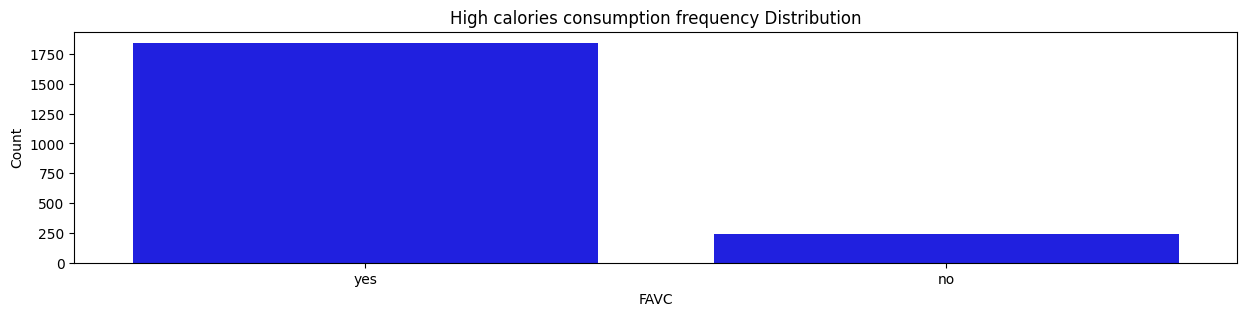

In [17]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='FAVC', data=df, color='blue', order=df['FAVC'].value_counts().index)
plt.title('High calories consumption frequency Distribution') 
plt.xlabel('FAVC')  
plt.ylabel('Count')  
plt.show()


FAVC is selected for analysis as it is quite common sense to believe that High calories consumption frequency can significantly affect obesity level
Based on the graph and the descriptive statistics of FAVC, observations can be concluded as:

- The question asked for the surveyees are quite basic with only yes or no, rather than informatively asking for amount of consumption
- In overall, the distribution of data is significantly imbalanced, with the populations eating high calories accounts for close to 90% of the dataset


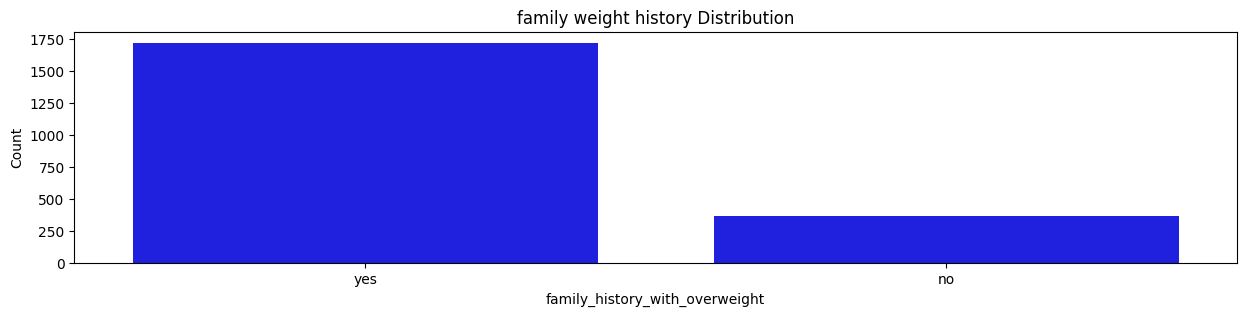

In [18]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='family_history_with_overweight', data=df, color='blue', order=df['family_history_with_overweight'].value_counts().index)
plt.title('family weight history Distribution') 
plt.xlabel('family_history_with_overweight')  
plt.ylabel('Count')  
plt.show()


Family's overweight history is selected for analysis as it is quite clear that obesity level or eating habit be affected by hereditary element.
Based on the graph and the descriptive statistics of family_history_with_overweight, observations can be concluded as:

- The question asked for the surveyees are quite basic with only yes or no, rather than informatively asking for quantity or quality
- In overall, the distribution of data is significantly imbalanced, with the populations with overweight family member(s) accounts for more than 80% of the dataset


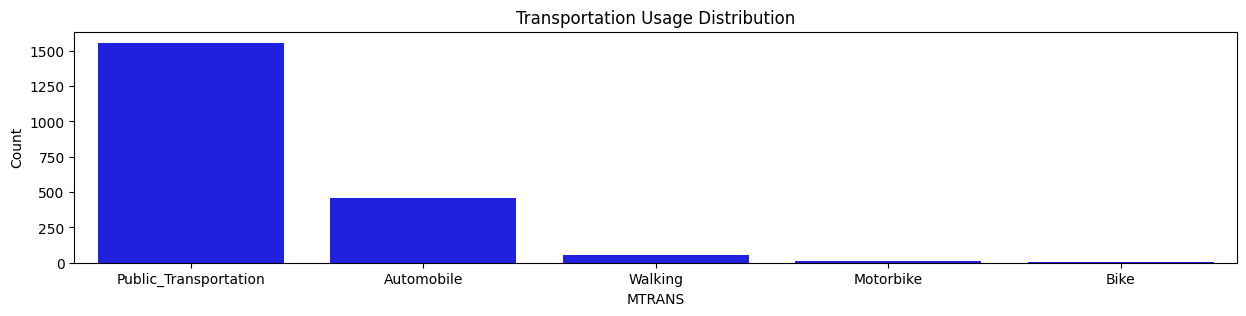

In [19]:
plt.figure(figsize=(15, 3))  # Set the figure size for a single plot
sns.countplot(x='MTRANS', data=df, color='blue', order=df['MTRANS'].value_counts().index)
plt.title('Transportation Usage Distribution') 
plt.xlabel('MTRANS')  
plt.ylabel('Count')  
plt.show()


MTRANS is selected for analysis since the choice of transportation is crucial to affect how people can regularly exercise, that can lead to obesity.
Based on the graph and the descriptive statistics of MTRANS, observations can be concluded as:

- In the questionaire, there are 5 means of transportations mentioned with 3 automatic (public transportation, automobile, and motorbike) and 2 options of physical (walking, bike)
- In overall, people tend to use automatic mean of transportation (with public transportation and automobile accounts for more than 3/4 share of the dataset) and this could be crucial factor that leads to high level of obesity


## EDA Bivariate Analysis


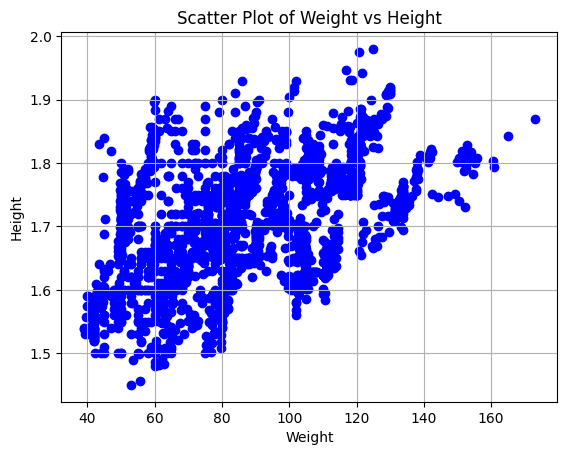

In [20]:
plt.scatter(df['Weight'], df['Height'], color='blue')
plt.title('Scatter Plot of Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

In [21]:
correlation = df['Height'].corr(df['Weight'])
print(f'Pearson Correlation Coefficient of Height and Weight: {correlation}')

Pearson Correlation Coefficient of Height and Weight: 0.4574680225940452


**Hypothesis: The taller you are, the more you weigh**

- From the graph, it can be observed that lowest weight values distribute symmetrically with lowest height values
- The more height values increase, The more weight values increase in a same manner
- Yet, this correlation is rather weak with the index of 0.46. This can explained in the graph that there are many scattered points are in a same horizontal and vertical lines


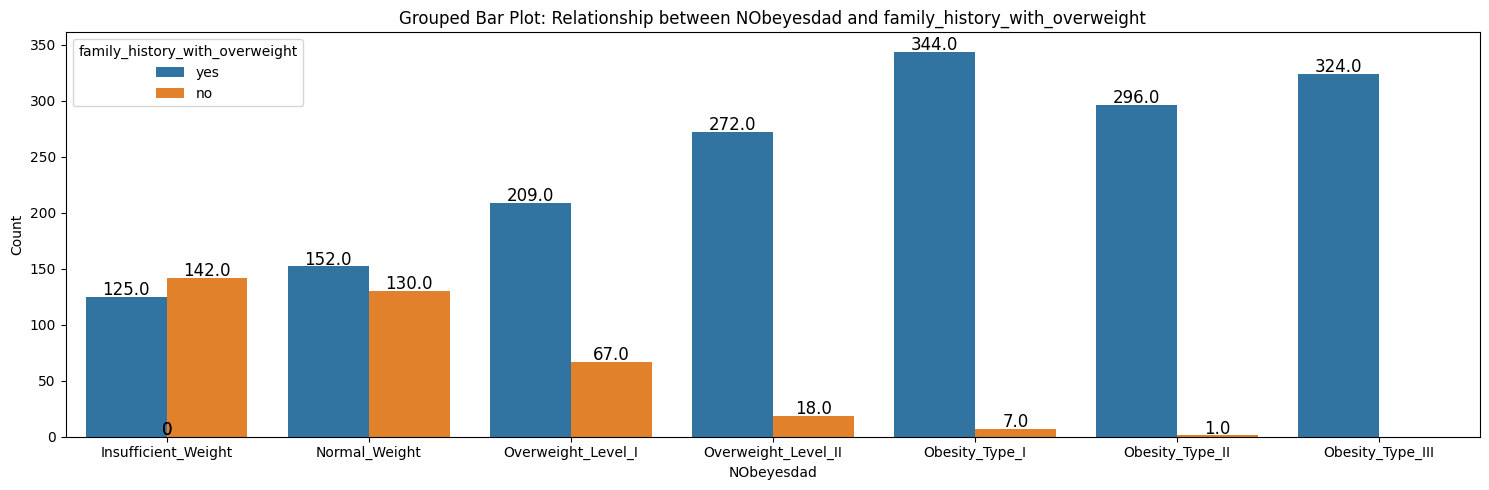

In [22]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='NObeyesdad', hue='family_history_with_overweight', order=order_nobeyesdad)

# Add the value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Set the labels and title
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Relationship between NObeyesdad and family_history_with_overweight')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

**Hypothesis: If you have no member in your family who has obesity, you have a high chance of not having obesity.**

- It is observable from the graph, the number of people who have no member in the family who has obesity gradually descreases from the first weight level to the very last (decrease from 146 to 0)
- On the other hand, the number of people who have at least one member in the family who has obesity relatively increases from the first weight level to the last level (increase from 126 to 324)
- If we look at the level of insufficient and normal weight, the number of families with overweight history is the lowest compared to the entire population
- This indicates that people are less likely to have overweight or obesity problem with none of their family members have overweight history


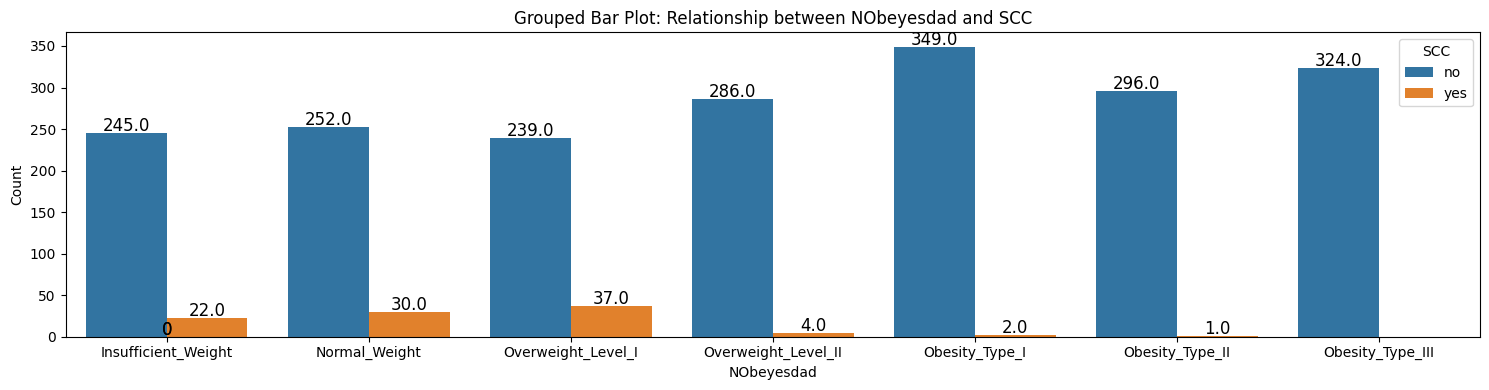

In [23]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

plt.figure(figsize=(15, 4))
ax = sns.countplot(data=df, x='NObeyesdad', hue='SCC', order=order_nobeyesdad)

# Add the value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Set the labels and title
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.title('Grouped Bar Plot: Relationship between NObeyesdad and SCC')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

**Hypothesis: People who monitor their health daily are less likely to have obesity**

- It is observable from the graph, the number of people who monitor their health daily distibutes denser at lower weight levels
- Meanwhile, the number of people who don't monitor their health daily slightly increases to the higher weight levels, yet the increase rate is quite low
- This indicates that people are less likely to have overweight or obesity problem if they monitor their health daily
- However, this correlation is quite low


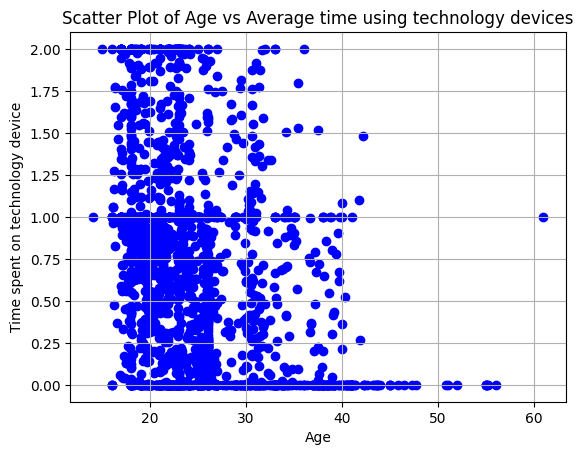

In [24]:
plt.scatter(df['Age'], df['TUE'], color='blue')
plt.title('Scatter Plot of Age vs Average time using technology devices')
plt.xlabel('Age')
plt.ylabel('Time spent on technology device')
plt.grid(True)
plt.show()

Hypothesis: The older people get, the less time they spend on technology devices

- From the graph, it can be observed that after 40 years of age, time spent on technology devices are mostly 0 hour
- However, this relationship is significantly weak to be factual as the population of old age people are very low
- On the other hand, data points of people in their 20s or below scatter across the full range of time spent on technology devices


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\3395831995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')


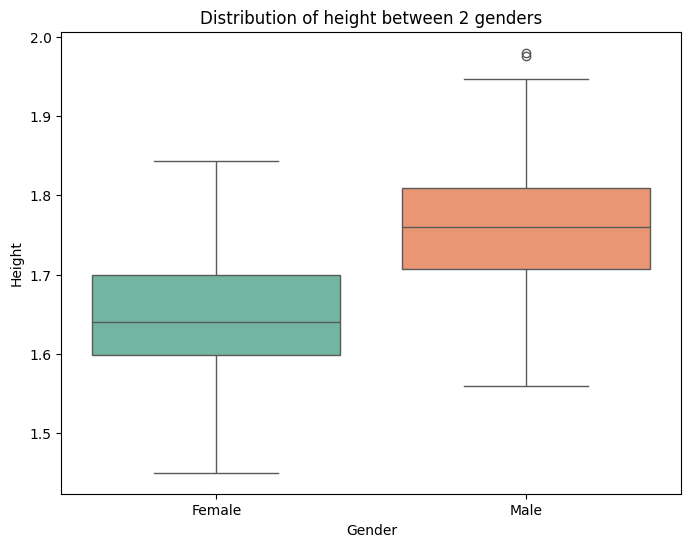

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Height', data=df, palette='Set2')
# Title and labels
plt.title('Distribution of height between 2 genders')
plt.xlabel('Gender')
plt.ylabel('Height')
# Show the plot
plt.show()

**Hypothesis: In overall, men are relatively taller than women**

- Male population mostly gathers around 1.7 and 1.8 meter tall, with a very small amount of outliers locates close at 2 meter
- Female population mostly gathers around 1.6 and 1.7 meter tall
- This indicates that most of men are taller than women
- However, in the overall of population, there are still many values overlap between around 1.55 to 1.85 meter, which suggests that this information is not sufficiently factual


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\4186622366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='Height', data=df, palette='Set2')


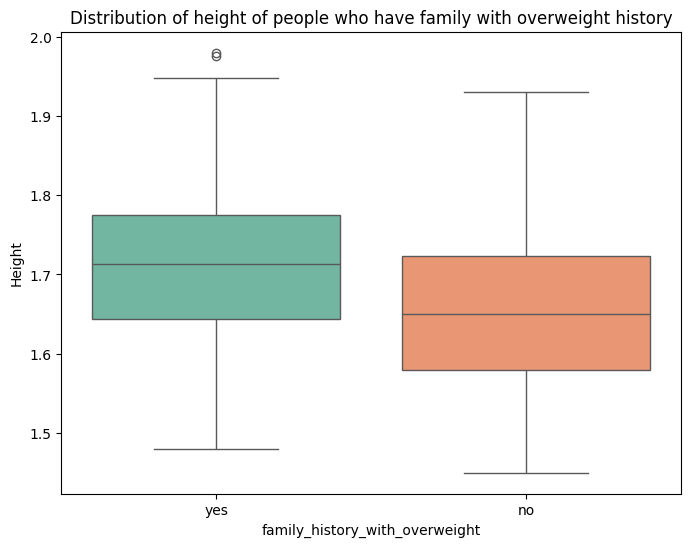

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_history_with_overweight', y='Height', data=df, palette='Set2')
# Title and labels
plt.title('Distribution of height of people who have family with overweight history')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Height')
# Show the plot
plt.show()

**Hypothesis: In overall, people with family members who have overweight history are taller than who don't**

- People with family members who have overweight history mostly gathers around 1.65 and 1.78 meter tall, with a very small amount of outliers locates close to 2 meter
- People without family members who have overweight history mostly gathers around 1.58 and 1.72 meter tall, with a very small amount of outliers locates close to 1.95 meter
- This indicates that there are a slight number of people with family members who have overweight history are taller than who without
- However, in the overall of population, there are still many values overlap at all heights, which suggests that this relationship is significantly weak


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\1030019011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='Weight', data=df, palette='Set2')


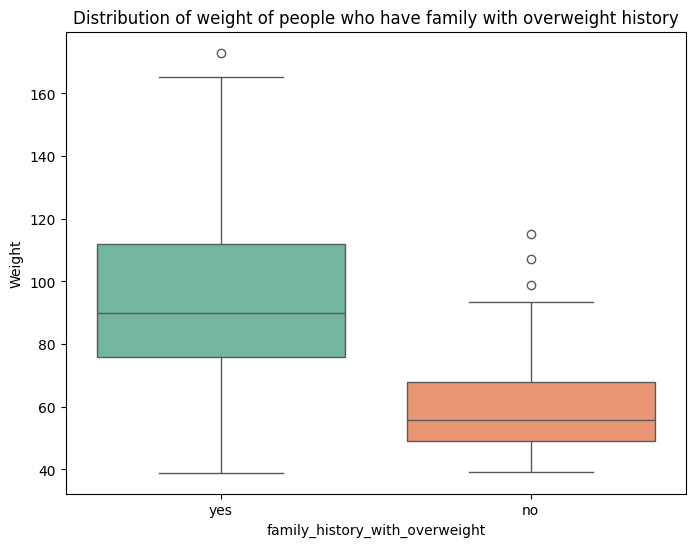

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=df, palette='Set2')
# Title and labels
plt.title('Distribution of weight of people who have family with overweight history')
plt.xlabel('family_history_with_overweight')
plt.ylabel('Weight')
# Show the plot
plt.show()

**Hypothesis: In overall, people with family members who have overweight history weigh heavier than who don't**

- People with family members who have overweight history mostly gathers around 78 to 115 kg, with a very small amount of outliers locates above 160 kg
- People without family members who have overweight history mostly gathers around 50 to 70 kg, with a very small amount of outliers locates close to 110 kg
- This indicates that most of people with family members who have overweight history weigh higher than who without
- Both high distributions of the 2 categories of family_history_with_overweight don't intersect, except only a few data points


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\483973949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='FCVC', data=df, palette='Set2')


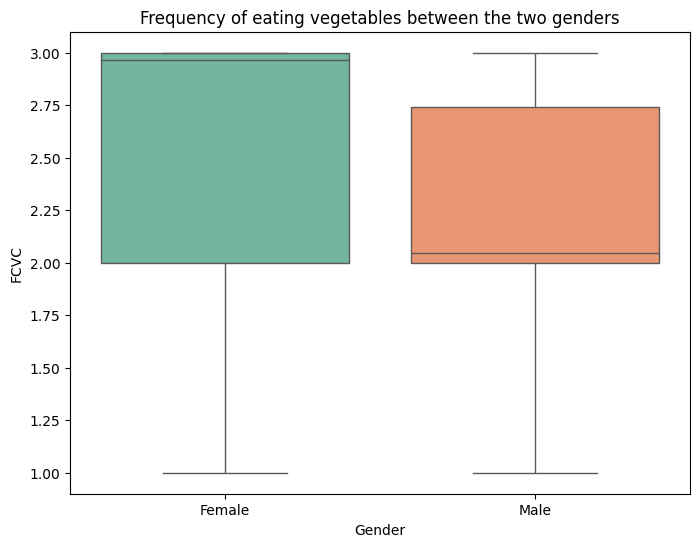

In [28]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='FCVC', data=df, palette='Set2')
# Title and labels
plt.title('Frequency of eating vegetables between the two genders')
plt.xlabel('Gender')
plt.ylabel('FCVC')
# Show the plot
plt.show()

**Hypothesis: In overall, Female eat vegetables more oftern than male**

- Male's eating vegetables habit index highly distributes from 2 to 2.75, with the median locates very close to 2
- Female's eating vegetables habit index highly distributes from 2 to 3, with the median locates very close to 3
- This indicates that most of women eat more vegetables in their meals more than men do
- However, in the overall of population, the high distribution of data points of the 2 genders overlap from 2 to 2.75, which suggests that this information is not sufficiently factual


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\927789214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='CH2O', data=df, order=order_nobeyesdad, palette='Set2')


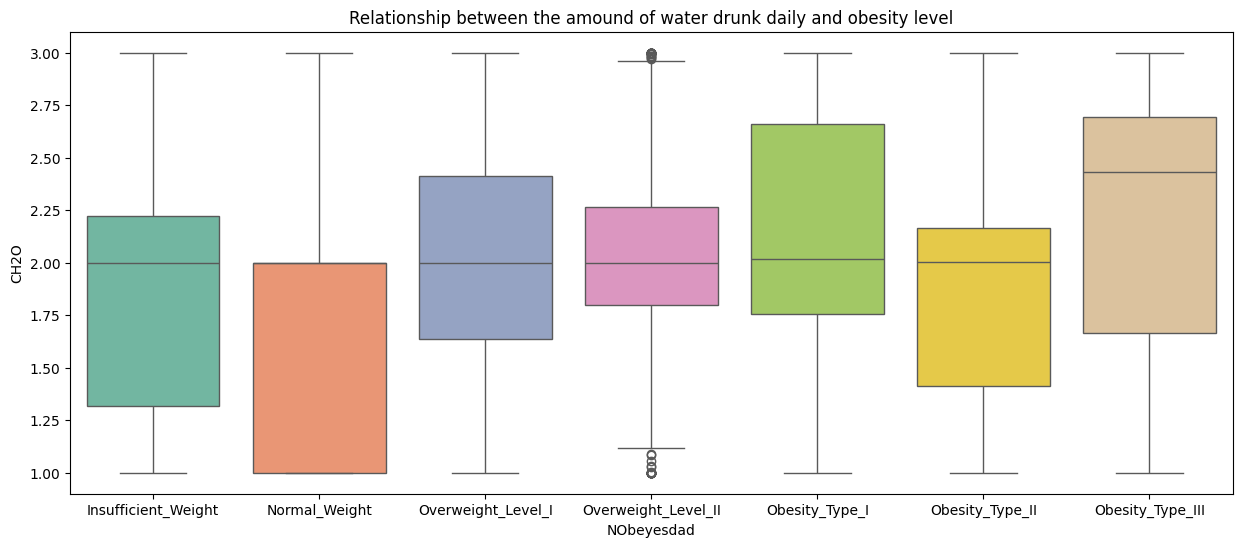

In [29]:
order_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
df['NObeyesdad'] = pd.Categorical(df['NObeyesdad'], categories=order_nobeyesdad, ordered=True)
# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x='NObeyesdad', y='CH2O', data=df, order=order_nobeyesdad, palette='Set2')
# Title and labels
plt.title('Relationship between the amound of water drunk daily and obesity level')
plt.xlabel('NObeyesdad')
plt.ylabel('CH2O')
# Show the plot
plt.show()

**Hypothesis: People with normal weight or below usually drink less water daily**

- It can be seen that most people with insufficient or normal weight drink about 2 litre of water daily or less
- Meanwhile, people who have overweight or obesity mostly drink over 2 litre of water daily
- This indicates that drinking much water can lead to overweight or obesity problems
- However, the fact that people with type 2 obesity mostly drink less than 2 litre of water counteract this hypothesis and make its relationship weaker


C:\Users\nguy7155\AppData\Local\Temp\ipykernel_15376\3578256398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='family_history_with_overweight', y='CH2O', data=df, palette='Set2')


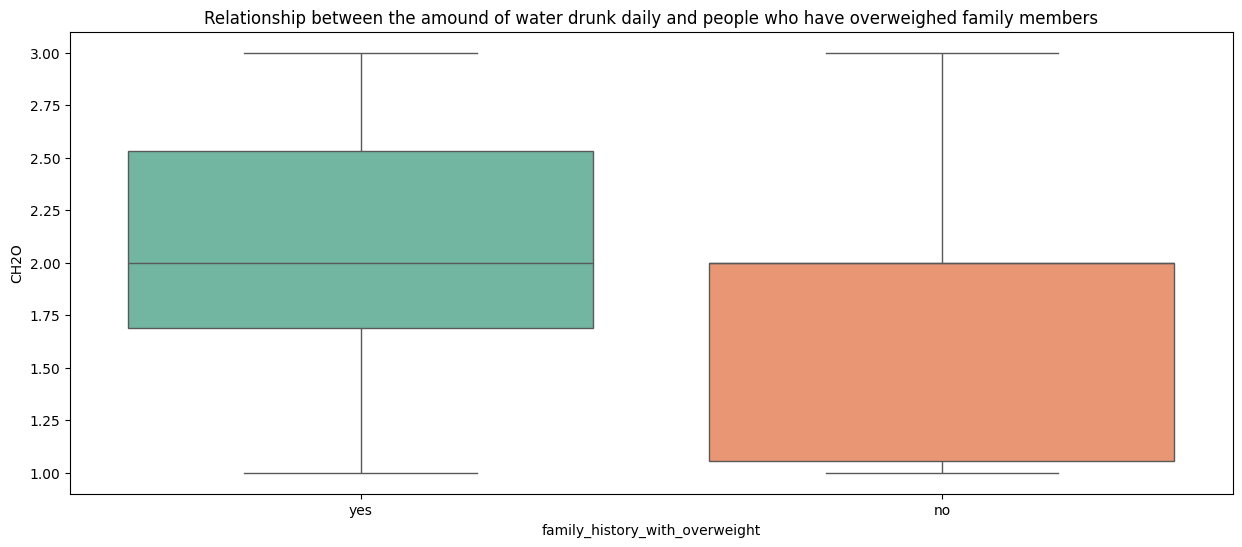

In [30]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='family_history_with_overweight', y='CH2O', data=df, palette='Set2')
# Title and labels
plt.title('Relationship between the amound of water drunk daily and people who have overweighed family members')
plt.xlabel('family_history_with_overweight')
plt.ylabel('CH2O')
# Show the plot
plt.show()

**Hypothesis: In overall, people with family members who have overweight history drink more water than who don't**

- People with family members who have overweight history drink about 1.75 to 2.5 litre of water daily
- While people without family members who have overweight history drink about 1 to 2 litre of water daily
- This indicates that people tend to drink more water daily if they have an overweighed family member
- However, this is a weak relationship since there are a lot of data points overlaping across from the full range of 1 to 3 litre of water drunk daily


# Data Modelling


## Features analysis


 For categorical and ordinal data, all values are valid as options of the survey, therefore, all data are considers true value and not outliers. Outliers are handled only for numerical data.


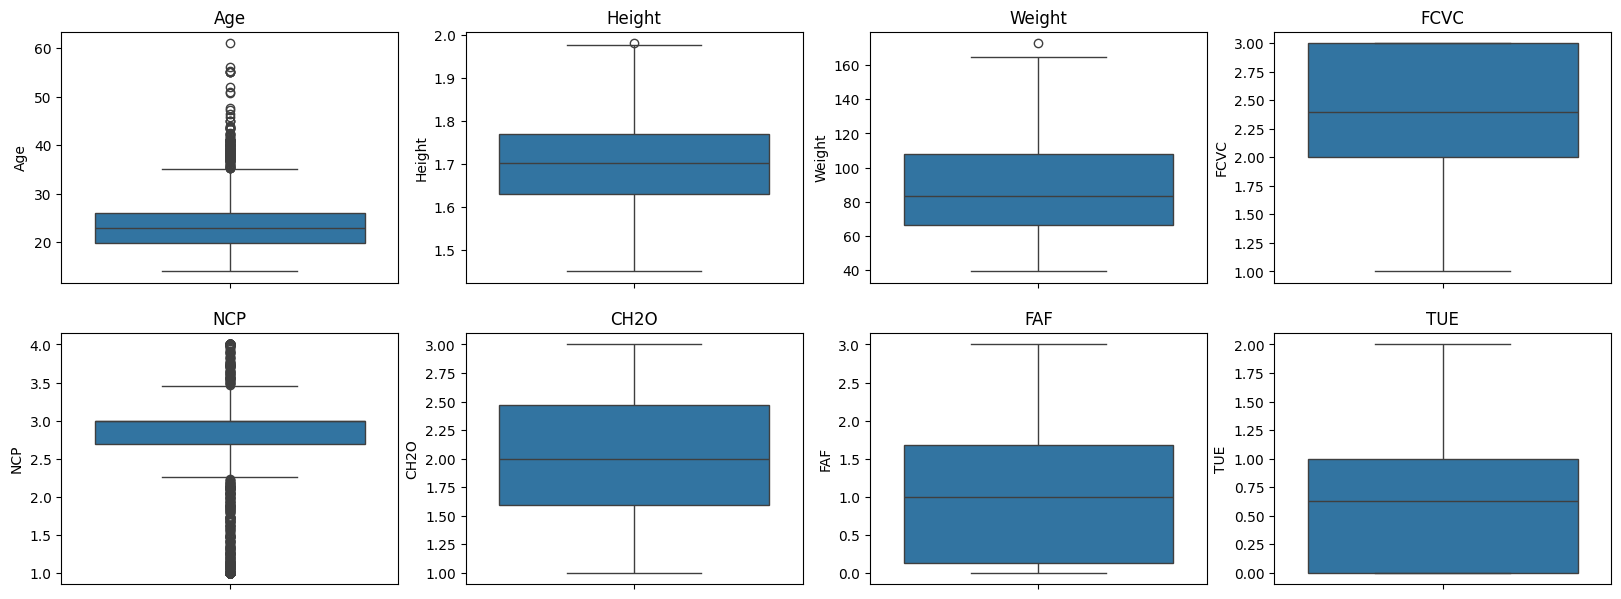

In [31]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

It is obeservable that Age and NCP have a significant amount of outliers, yet they have invalid values and will be kept in the modelling process


Feature Creating are conducted in this part as Mass Body Index is calculated based on equation **Mass Body Index = Weight / Height^2** to transform NObeyesdad to numeric value for analysis


In [32]:
# Calculate the Mass Body Index (MBI) as Weight / (Height^2)
df['Mass_body_index'] = df['Weight'] / (df['Height'] ** 2)

Since targets of the model are composite variable of Height and Weight by the equation **Mass Body Index = Weight / Height^2**, they will be dropped from the dataframe.

In [33]:
df = df.drop(columns=['Height', 'Weight'])

In [34]:
cat_cols=df.select_dtypes(include=['object','category']).columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Variables:
['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Mass_body_index']


In [35]:
from sklearn.preprocessing import PowerTransformer

# Calculate skewness
skewness = df[num_cols].skew()

# Identify skewed columns
skewed_cols = skewness[abs(skewness) > 1].index

# PowerTransformer for more general skewness correction
transformer = PowerTransformer(method='yeo-johnson')  # or 'box-cox' for positive values
df[skewed_cols] = transformer.fit_transform(df[skewed_cols])

In [36]:
# Age values are normalised
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])


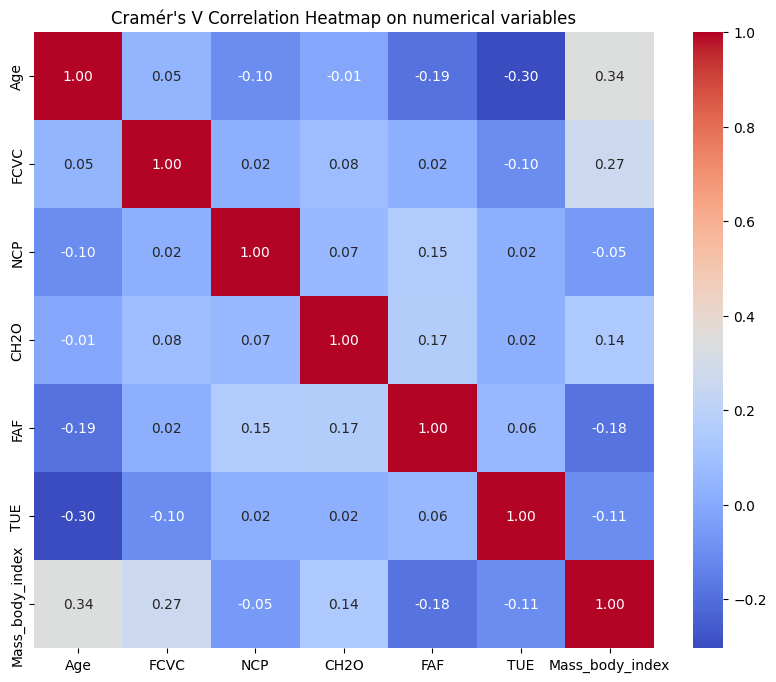

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Heatmap on numerical variables")
plt.show()

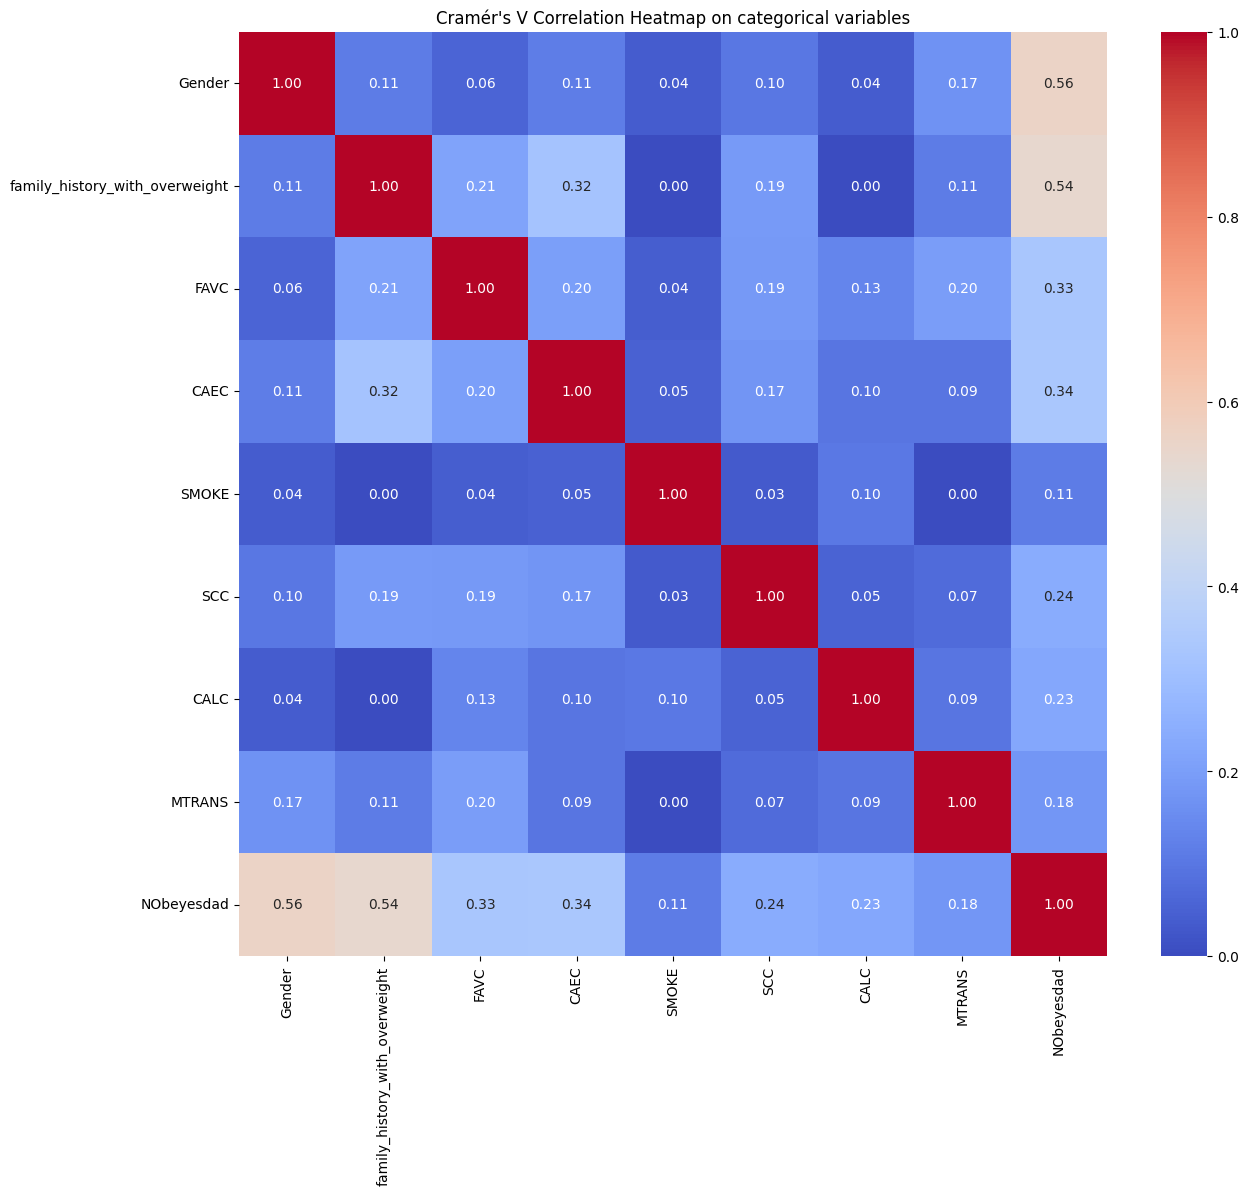

In [38]:
# Calculate the Cramér’s V and correlation matrix
assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

# Plot the heatmap with correlation values in each block
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Cramér's V Correlation Heatmap on categorical variables")
plt.show()


## Classification Problem


### Features selection


#### Numerical features


In [39]:
target = 'Mass_body_index'
num_features = df[num_cols].columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

#### Categorical features


In [40]:
categorical_target = 'NObeyesdad'

cat_features = df[cat_cols].columns.drop(categorical_target)

assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]

In [41]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


#### Encoding and splitting

In [42]:
label_encoder = LabelEncoder()
for col in cat_cols:
    if df[col].dtype == 'object':  # Check if the column contains non-numeric data
        df[col] = label_encoder.fit_transform(df[col])

X = df[selected_features] 
y = df[categorical_target]  # Target variable 'NObeyesdad'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [43]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for multi-class balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after resampling
print(f"Class distribution before SMOTE:\n{y_train.value_counts()}")
print(f"Class distribution after SMOTE:\n{pd.Series(y_res).value_counts()}")

Class distribution before SMOTE:
NObeyesdad
Obesity_Type_I         281
Obesity_Type_III       264
Overweight_Level_II    241
Obesity_Type_II        233
Normal_Weight          221
Overweight_Level_I     221
Insufficient_Weight    208
Name: count, dtype: int64
Class distribution after SMOTE:
NObeyesdad
Insufficient_Weight    281
Normal_Weight          281
Overweight_Level_I     281
Overweight_Level_II    281
Obesity_Type_I         281
Obesity_Type_II        281
Obesity_Type_III       281
Name: count, dtype: int64


c:\Users\nguy7155\OneDrive - Rackspace Inc\Desktop\PDS\ds_data_modelling\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\nguy7155\OneDrive - Rackspace Inc\Desktop\PDS\ds_data_modelling\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


### Random Forest

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Random Forest: 0.8744139187042276
Tuned Random Forest Accuracy on test set: 0.8516746411483254
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.86      0.90        59
      Normal_Weight       0.65      0.69      0.67        61
     Obesity_Type_I       0.80      0.91      0.85        70
    Obesity_Type_II       0.94      0.94      0.94        64
   Obesity_Type_III       1.00      1.00      1.00        60
 Overweight_Level_I       0.83      0.71      0.76        55
Overweight_Level_II       0.83      0.82      0.82        49

           accuracy                           0.85       418
          macro avg       0.86      0.85      0.85       418
       weighted avg       0.86      0.85      0.85       418

Confusion Matrix:


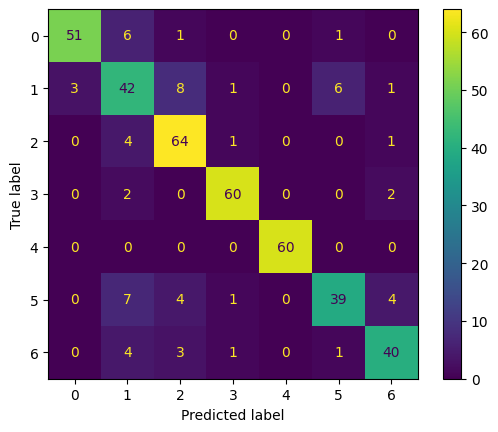

In [44]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=skf, n_jobs=-1)
grid_search_rf.fit(X_res, y_res)

# Best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Use the best model to make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

print("Tuned Random Forest Accuracy on test set:", accuracy_score(y_test, y_pred_best_rf))
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
class_report = classification_report(y_test, y_pred_best_rf)

print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) 
disp.plot() 
plt.show()

In [45]:
# Features importance
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
0,Age,0.166417
1,FCVC,0.141574
4,FAF,0.097606
2,NCP,0.097227
3,CH2O,0.092588
5,TUE,0.091260
6,Gender,0.067548
9,CAEC,0.054489
7,family_history_with_overweight,0.054350
12,CALC,0.053983


### XGBoost

In [46]:
label_encoder = LabelEncoder()
df[categorical_target] = label_encoder.fit_transform(df[categorical_target])

X = df[selected_features] 
y = df[categorical_target]  # Target variable 'NObeyesdad'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE for multi-class balancing
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check the balance of the classes after resampling
print(f"Class distribution before SMOTE:\n{y_train.value_counts()}")
print(f"Class distribution after SMOTE:\n{pd.Series(y_res).value_counts()}")

Class distribution before SMOTE:
NObeyesdad
2    281
4    264
6    241
3    233
1    221
5    221
0    208
Name: count, dtype: int64
Class distribution after SMOTE:
NObeyesdad
1    281
0    281
6    281
3    281
4    281
5    281
2    281
Name: count, dtype: int64


c:\Users\nguy7155\OneDrive - Rackspace Inc\Desktop\PDS\ds_data_modelling\.venv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\nguy7155\OneDrive - Rackspace Inc\Desktop\PDS\ds_data_modelling\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.7}
Best Score for XGBoost: 0.864769248653466
Tuned XGBoost Accuracy on test set: 0.8444976076555024
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        59
           1       0.62      0.66      0.64        61
           2       0.79      0.89      0.84        70
           3       0.95      0.97      0.96        64
           4       0.98      1.00      0.99        60
           5       0.81      0.76      0.79        55
           6       0.78      0.78      0.78        49

    accuracy                           0.84       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.85      0.84      0.85       418

Confusion Matrix:


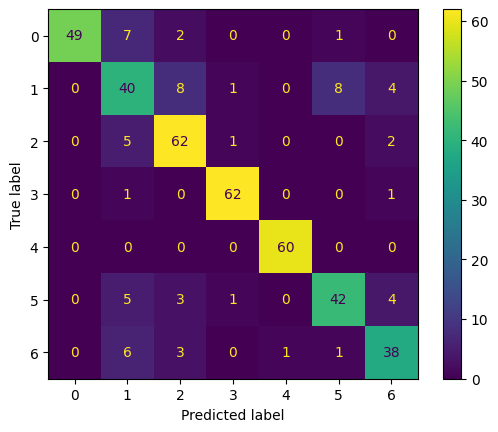

In [48]:
from sklearn.base import BaseEstimator, ClassifierMixin
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


class CustomXGBClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, **kwargs):
        # Initialize the model with all passed arguments
        self.model = xgb.XGBClassifier(**kwargs)

    def fit(self, X, y):
        # Train the model
        self.model.fit(X, y)
        return self

    def predict(self, X):
        # Make predictions
        return self.model.predict(X)

    def predict_proba(self, X):
        # Return probabilities
        return self.model.predict_proba(X)

    def get_tags(self):
        # Define scikit-learn tags
        return {'predict_proba': True, 'fit': True, 'predict': True}

    def set_params(self, **params):
        # Pass the parameters to the model
        self.model.set_params(**params)
        return self


# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],               # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],                   # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.05],           # Learning rate (shrinkage)
    'subsample': [0.5, 0.7, 0.8, 1.0],                  # Fraction of samples to be used in each boosting round
}

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with CustomXGBClassifier
grid_search_xgb = GridSearchCV(
    estimator=CustomXGBClassifier( random_state=42),
    param_grid=param_grid_xgb,
    cv=skf,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
)

# Fit the GridSearchCV
grid_search_xgb.fit(X_res, y_res)

# Best parameters and best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)

# Use the best model to make predictions
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

print("Tuned XGBoost Accuracy on test set:", accuracy_score(y_test, y_pred_best_xgb))
conf_matrix = confusion_matrix(y_test, y_pred_best_xgb)
class_report = classification_report(y_test, y_pred_best_xgb)

print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix) 
disp.plot() 
plt.show()


In [49]:
from sklearn.inspection import permutation_importance
results = permutation_importance(best_xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display feature importances
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': results.importances_mean
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

## Regression Problem


### Features selection


#### Numerical features


In [50]:
target = 'Mass_body_index'
num_features = df[num_cols].columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection
threshold = 0.1
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

#### Categorical features


In [51]:
categorical_target = 'NObeyesdad'

cat_features = df[cat_cols].columns.drop(categorical_target)

assoc = associations(df[cat_cols], nominal_columns='all', plot=False)
corr_matrix = assoc['corr']

threshold = 0.1
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()

del selected_cat_features[-1]

#### Final features


In [52]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

print(selected_features)

['Age', 'FCVC', 'CH2O', 'FAF', 'TUE', 'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [53]:
X = df[selected_features] 
y = df[target]  # Target variable 'Mass_body_index'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### KNN Regression 


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mean Squared Error (MSE): 0.00818786925544184
Root Mean Squared Error (RMSE): 0.09048684575915905
R-squared (R²): 0.8212723103372536


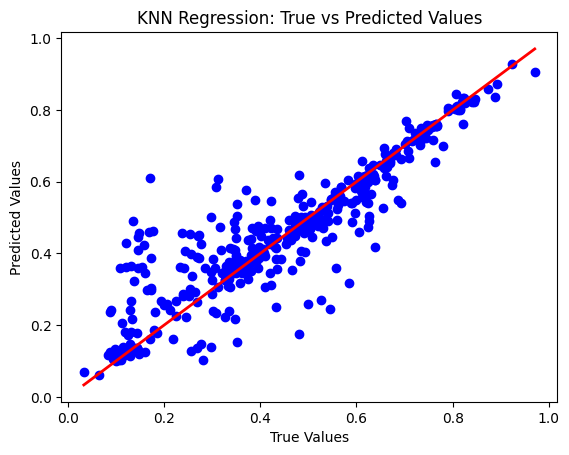

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],             # Number of neighbors
    'weights': ['uniform', 'distance'],          # Weighting of neighbors
    'metric': ['euclidean', 'manhattan']        # Distance metric
}

# Create KNN regressor model
knn = KNeighborsRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

# Plot results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: True vs Predicted Values')
plt.show()

In [55]:
from sklearn.inspection import permutation_importance

# Compute permutation feature importance
result = permutation_importance(best_knn, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to display results
feature_importance_knn = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
})

# Sort by importance
feature_importance_knn = feature_importance_knn.sort_values(by='Importance', ascending=False)
feature_importance_knn

,Feature,Importance
6,family_history_with_overweight,0.450548
5,Gender,0.331186
12,MTRANS,0.277567
11,CALC,0.223351
8,CAEC,0.185284
1,FCVC,0.086894
4,TUE,0.075462
7,FAVC,0.073115
3,FAF,0.072834
0,Age,0.060618


### Random Forest Regression


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 0.0060995008653290245
Root Mean Squared Error (RMSE): 0.07809930131140115
R-squared (R²): 0.8668579500055351


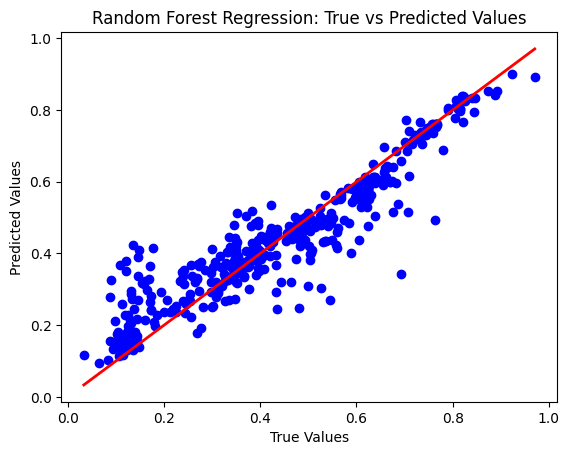

In [56]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Max depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Output the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

# Plot results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: True vs Predicted Values')
plt.show()


In [57]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Feature names from your training set
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
feature_importance_rf

,Feature,Importance
0,Age,0.157960
6,family_history_with_overweight,0.154199
1,FCVC,0.136828
4,TUE,0.118421
8,CAEC,0.099649
3,FAF,0.097142
2,CH2O,0.071042
5,Gender,0.051125
11,CALC,0.043799
12,MTRANS,0.036798
